In [1]:
import os
import xml.etree.ElementTree as ET
import json
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
oai = '{http://www.openarchives.org/OAI/2.0/}'
oai_dc = '{http://www.openarchives.org/OAI/2.0/oai_dc/}'
dc = '{http://purl.org/dc/elements/1.1/}'

In [3]:
def count_files(folder):
    """ Count how many files each publication has. """
    publications = dict()
    for f in os.listdir(folder):
        root = ET.parse(f'{folder}/{f}').getroot()
        records = root.find(f'{oai}ListRecords')
        for record in records:
            header = record.find(f'{oai}header')
            if record.tag == f'{oai}resumptionToken':
                continue
            elif 'status' in header.attrib and header.attrib['status'] == 'deleted':
                continue
            try:
                id = header.find(f'{oai}identifier').text
                metadata = record.find(f'{oai}metadata').find(f'{oai_dc}dc')
                publications[id] = len(metadata.findall(f'{dc}format'))
            except AttributeError:
                print(f, id)
                import sys; sys.exit(0)
    return publications

In [4]:
tu = count_files('../../data/xml/depositonce')
hu = count_files('../../data/xml/edoc')
fu = count_files('../../data/xml/refubium')
all = dict(tu, **hu, **fu)
len(all), len(hu), len(fu), len(tu)

(61780, 22053, 28452, 11275)

In [10]:
def distr(data):
    """ data is a dict with lists as values. Return the count of lengths of those lists. """
    lengths, cnt = zip(*sorted(Counter(data.values()).items()))
    lengths, cnt = list(lengths), list(cnt)
    y = []
    i = 0
    while len(cnt) > 0:
        if lengths[0] == i:
            y.append(cnt.pop(0))
            lengths.pop(0)
        else:
            y.append(0)
        i += 1
    return y

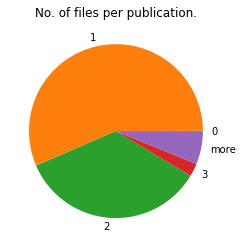

In [14]:
y = distr(all)
wedges = {str(i): y[i] for i in range(0, 4)}
wedges.update({'more': sum(y[4:])})
plt.pie(wedges.values(), labels=wedges.keys())
plt.title('No. of files per publication.')
plt.show()

In [15]:
wedges

{'0': 28, '1': 34891, '2': 21554, '3': 1481, 'more': 3826}